In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math

In [5]:
filname_1 = 'RUN_d_0.78/deltaN_12000.dat'
filname_2 = 'RUN_d_0.94/deltaN_12000.dat'
filname_3 = 'RUN_d_1.4/deltaN_12000.dat'
filname_true = 'RUN_true/deltaN_12000.dat'

In [238]:
filname_1_1 = 'RUN_d_0.78/deltaN_11990.dat'
filname_1_2 = 'RUN_d_0.78/deltaN_11980.dat'
filname_1_3 = 'RUN_d_0.78/deltaN_11900.dat'
filname_1_4 = 'RUN_d_0.78/deltaN_11800.dat'

filname_2_1 = 'RUN_d_0.94/deltaN_11990.dat'
filname_2_2 = 'RUN_d_0.94/deltaN_11980.dat'
filname_2_3 = 'RUN_d_0.94/deltaN_11900.dat'
filname_2_4 = 'RUN_d_0.94/deltaN_11800.dat'

filname_3_1 = 'RUN_d_1.4/deltaN_11990.dat'
filname_3_2 = 'RUN_d_1.4/deltaN_11980.dat'
filname_3_3 = 'RUN_d_1.4/deltaN_11900.dat'
filname_3_4 = 'RUN_d_1.4/deltaN_11800.dat'

filname_true_1 = 'RUN_true/deltaN_11990.dat'
filname_true_2 = 'RUN_true/deltaN_11980.dat'
filname_true_3 = 'RUN_true/deltaN_11900.dat'
filname_true_4 = 'RUN_true/deltaN_11800.dat'

In [21]:
dm_1 = np.fromfile(filname_1, dtype=np.float32).reshape((1400, 56, 56))
dm_2 = np.fromfile(filname_2, dtype=np.float32).reshape((1400, 56, 56))
dm_3 = np.fromfile(filname_3, dtype=np.float32).reshape((1400, 56, 56))
dm_true = np.fromfile(filname_true, dtype=np.float32).reshape((1400, 56, 56))

In [239]:
dm_1_1 = np.fromfile(filname_1_1, dtype=np.float32).reshape((1400, 56, 56))
dm_1_2 = np.fromfile(filname_1_2, dtype=np.float32).reshape((1400, 56, 56))
dm_1_3 = np.fromfile(filname_1_3, dtype=np.float32).reshape((1400, 56, 56))
dm_1_4 = np.fromfile(filname_1_4, dtype=np.float32).reshape((1400, 56, 56))

dm_2_1 = np.fromfile(filname_2_1, dtype=np.float32).reshape((1400, 56, 56))
dm_2_2 = np.fromfile(filname_2_2, dtype=np.float32).reshape((1400, 56, 56))
dm_2_3 = np.fromfile(filname_2_3, dtype=np.float32).reshape((1400, 56, 56))
dm_2_4 = np.fromfile(filname_2_4, dtype=np.float32).reshape((1400, 56, 56))

dm_3_1 = np.fromfile(filname_2_1, dtype=np.float32).reshape((1400, 56, 56))
dm_3_2 = np.fromfile(filname_2_2, dtype=np.float32).reshape((1400, 56, 56))
dm_3_3 = np.fromfile(filname_2_3, dtype=np.float32).reshape((1400, 56, 56))
dm_3_4 = np.fromfile(filname_2_4, dtype=np.float32).reshape((1400, 56, 56))

dm_true_1 = np.fromfile(filname_true_1, dtype=np.float32).reshape((1400, 56, 56))
dm_true_2 = np.fromfile(filname_true_2, dtype=np.float32).reshape((1400, 56, 56))
dm_true_3 = np.fromfile(filname_true_3, dtype=np.float32).reshape((1400, 56, 56))
dm_true_4 = np.fromfile(filname_true_4, dtype=np.float32).reshape((1400, 56, 56))

In [20]:
print(pearsonr(dm_1, dm_true))
print(pearsonr(dm_2, dm_true))
print(pearsonr(dm_3, dm_true))

(0.0013135772283823133, 0.005916459687030403)
(0.002629447729046079, 3.5972407111235556e-08)
(0.0026171324348199143, 4.163817941532392e-08)


In [128]:
xgrid = np.arange(0,1400)
ygrid = np.arange(0,56)
zgrid = np.arange(0,56)
ymesh, xmesh, zmesh = np.meshgrid(ygrid, xgrid, zgrid)
y, x, z = np.meshgrid(np.arange(-56,56,2)+1, np.arange(50,2850,2)+1, np.arange(-56,56,2)+1)

In [129]:
tan = np.sqrt(y**2 + z**2)/x

In [130]:
theta = np.arctan(tan)*180/np.pi

## for d = 0.78 deg

In [232]:
iin = np.where(theta<0.39)

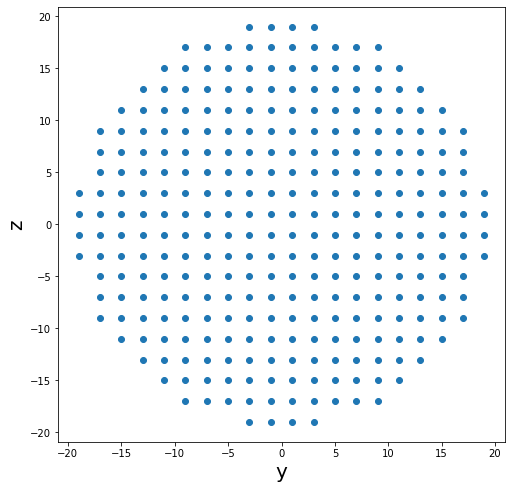

In [243]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.scatter(y[iin][xmesh[iin]==1399], z[iin][xmesh[iin]==1399])
plt.xlabel('y',fontsize=20)
plt.ylabel('z',fontsize=20)
plt.show()

In [242]:
dm_lc_1 = dm_1[xmesh[iin], ymesh[iin], zmesh[iin]]
dm_lc_true = dm_true[xmesh[iin], ymesh[iin], zmesh[iin]]

In [203]:
r, p = pearsonr(dm_lc_1, dm_lc_true)
print(r)

0.09660603485920466


In [204]:
def ReconPearsonr(dm, radius):
    iin = np.where(theta<radius)
    dm_lc = dm[xmesh[iin], ymesh[iin], zmesh[iin]]
    dm_lc_true = dm_true[xmesh[iin], ymesh[iin], zmesh[iin]]
    r, p = pearsonr(dm_lc, dm_lc_true)
    return r

In [248]:
def ReconPearsonr1(dm, dmt, radius):
    iin = np.where(theta<radius)
    dm_lc = dm[xmesh[iin], ymesh[iin], zmesh[iin]]
    dm_lc_true = dmt[xmesh[iin], ymesh[iin], zmesh[iin]]
    r, p = pearsonr(dm_lc, dm_lc_true)
    return r

In [250]:
ReconPearsonr1(dm_1, dm_2, 0.1)

0.17694566461191488

In [237]:
ReconPearsonr(dm_1, 0.05)

0.2376680725921562

In [ ]:
r_array = np.arange(0.10, 0.71, 0.01)
Pearson_array = np.zeros(len(r_array))
Pearson_array_1 = np.zeros(len(r_array))
Pearson_array_2 = np.zeros(len(r_array))
Pearson_array_3 = np.zeros(len(r_array))
Pearson_array_4 = np.zeros(len(r_array))

for i in range(len(r_array)):
    Pearson_array[i] = ReconPearsonr(dm_1, r_array[i])
    Pearson_array_1[i] = ReconPearsonr(dm_1_1, r_array[i])
    Pearson_array_2[i] = ReconPearsonr(dm_1_2, r_array[i])
    Pearson_array_3[i] = ReconPearsonr(dm_1_3, r_array[i])
    Pearson_array_4[i] = ReconPearsonr(dm_1_4, r_array[i])

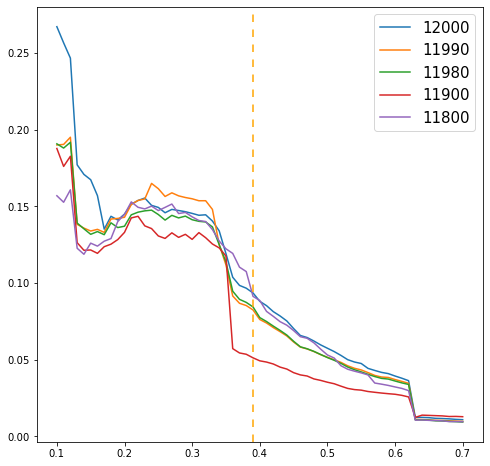

In [247]:
plt.figure(figsize=(8,8))
plt.plot(r_array,Pearson_array, label='12000')
plt.plot(r_array,Pearson_array_1, label='11990')
plt.plot(r_array,Pearson_array_2, label='11980')
plt.plot(r_array,Pearson_array_3, label='11900')
plt.plot(r_array,Pearson_array_4, label='11800')
plt.legend(fontsize=15)
plt.axvline(x=0.39, c='orange',linestyle=(0, (5, 5)))
plt.show()

## for d = 0.94 deg

In [181]:
iin = np.where(theta<0.47)
dm_lc_2 = dm_2[xmesh[iin], ymesh[iin], zmesh[iin]]
dm_lc_true = dm_true[xmesh[iin], ymesh[iin], zmesh[iin]]
pearsonr(dm_lc_2, dm_lc_true)

(0.09448597105584236, 0.0)

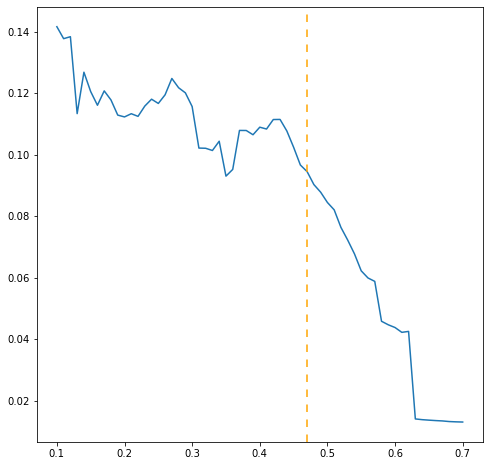

In [229]:
r_array = np.arange(0.1, 0.71, 0.01)
Pearson_array = np.zeros(len(r_array))
for i in range(len(r_array)):
    Pearson_array[i] = ReconPearsonr(dm_2, r_array[i])

plt.figure(figsize=(8,8))
plt.plot(r_array,Pearson_array) 
plt.axvline(x=0.47, c='orange',linestyle=(0, (5, 5)))
plt.show()

## for d = 1.4 deg

In [153]:
iin = np.where(theta<0.7)
dm_lc_3 = dm_3[xmesh[iin], ymesh[iin], zmesh[iin]]
dm_lc_true = dm_true[xmesh[iin], ymesh[iin], zmesh[iin]]
pearsonr(dm_lc_3, dm_lc_true)

(0.017406092071151305, 1.1626530188205623e-31)

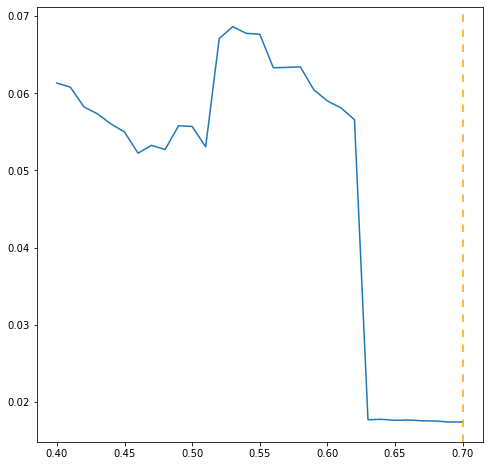

In [230]:
r_array = np.arange(0.40, 0.71, 0.01)
Pearson_array = np.zeros(len(r_array))
for i in range(len(r_array)):
    Pearson_array[i] = ReconPearsonr(dm_3, r_array[i])

plt.figure(figsize=(8,8))
plt.plot(r_array,Pearson_array) 
plt.axvline(x=0.7, c='orange',linestyle=(0, (5, 5)))
plt.show()